In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

print("All packages loaded successfully!")

All packages loaded successfully!


In [2]:

sns.set_style("whitegrid")
plt.rcParams.update({'figure.figsize': (12,6), 'font.size': 12})

In [3]:
data = pd.read_csv("../data/electricity-prod-source-stacked.csv")
data.head()
data2 = pd.read_csv("../data/owid-co2-data.csv")
data2.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


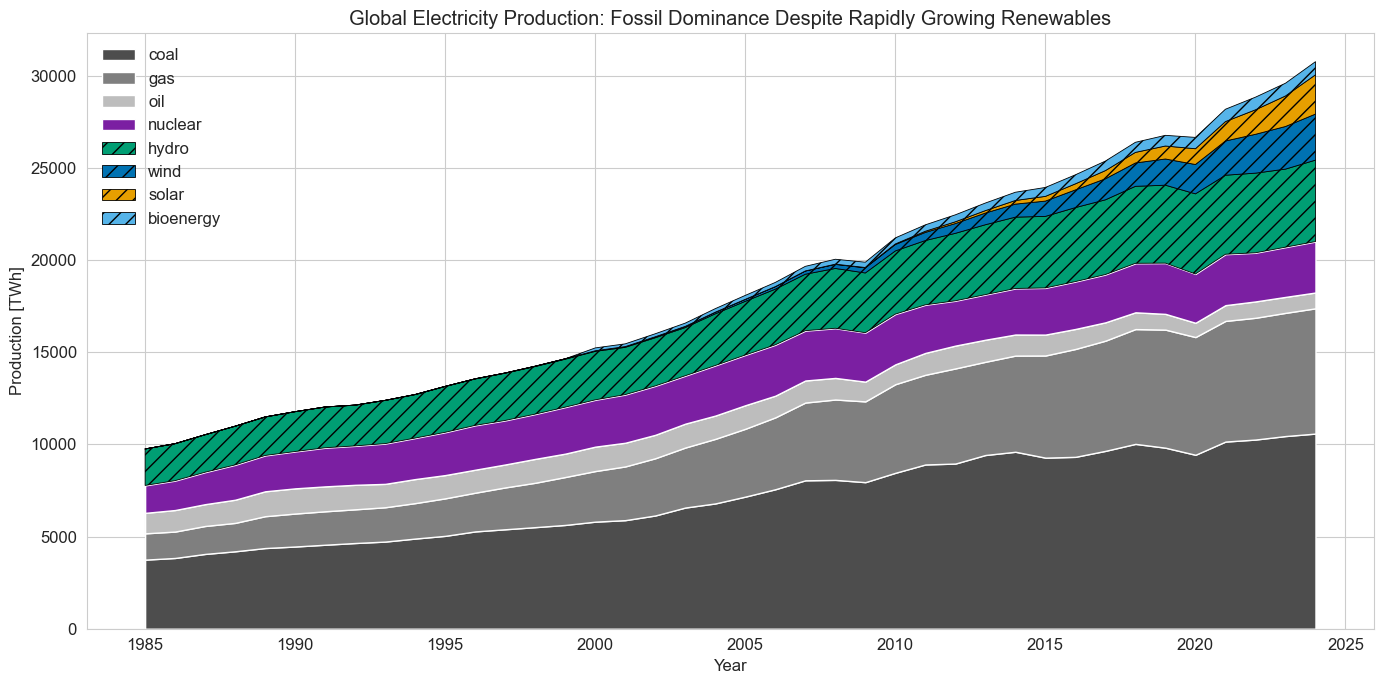

In [4]:
energy_global = data[data['Entity'] == 'World']

energy_columns = [
    "Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from nuclear - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]

colors = [
    "#4d4d4d",  # Coal (dark gray)
    "#7f7f7f",  # Gas (medium gray)
    "#bdbdbd",  # Oil (light gray)
    "#7b1fa2",  # Nuclear (violet)
    "#009e73",  # Hydro (turquoise green, colorblind safe)
    "#0072b2",  # Wind (blue, colorblind safe)
    "#e69f00",  # Solar (orange, colorblind safe)
    "#56b4e9"   # Bioenergy (light blue, colorblind safe)
]

plt.figure(figsize=(14, 7))
collections = plt.stackplot(
    energy_global['Year'],
    [energy_global[col] for col in energy_columns],
    labels=[col.split(' - ')[0].replace("Electricity from ", "") for col in energy_columns],
    colors=colors
)

# Add hatching to renewables (Hydro, Wind, Solar, Bioenergy)
renewable_indices = [4, 5, 6, 7]

for i in renewable_indices:
    collections[i].set_hatch('//')
    collections[i].set_edgecolor('black')
    collections[i].set_linewidth(0.6)

plt.legend(loc='upper left', frameon=False)
plt.title("Global Electricity Production: Fossil Dominance Despite Rapidly Growing Renewables")
plt.xlabel("Year")
plt.ylabel("Production [TWh]")
plt.tight_layout()
plt.show()


In [5]:
# Spalten für die Gruppen
renewables_cols = [
    "Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]

fossil_cols = [
    "Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]



C:\Users\Nico\AppData\Local\Temp\ipykernel_24448\561169851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Renewables'] = energy_global[renewables_cols].sum(axis=1)
C:\Users\Nico\AppData\Local\Temp\ipykernel_24448\561169851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Fossil Fuels'] = energy_global[fossil_cols].sum(axis=1)


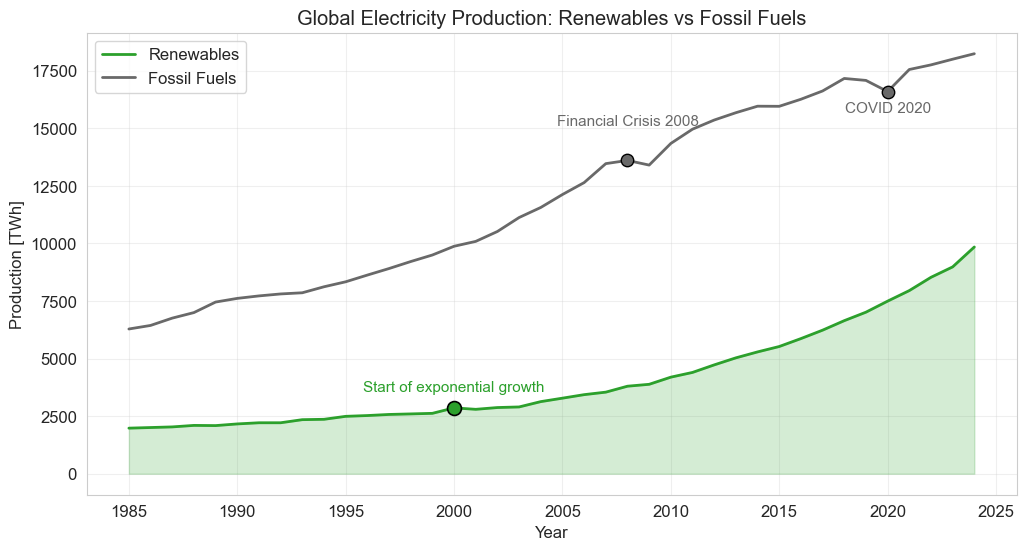

In [6]:
# Sum per group
energy_global['Renewables'] = energy_global[renewables_cols].sum(axis=1)
energy_global['Fossil Fuels'] = energy_global[fossil_cols].sum(axis=1)

plt.figure(figsize=(12,6))

# Lines
plt.plot(energy_global['Year'], energy_global['Renewables'], label='Renewables', color='#2ca02c', linewidth=2)  # bright green
plt.plot(energy_global['Year'], energy_global['Fossil Fuels'], label='Fossil Fuels', color='dimgray', linewidth=2)  # dark gray

# Fill area only under Renewables
plt.fill_between(energy_global['Year'], 0, energy_global['Renewables'], color='#2ca02c', alpha=0.2)

# --- Marker & Annotation for Renewables ---
year_annot_ren = 2000
renewables_value = energy_global.loc[energy_global['Year'] == year_annot_ren, 'Renewables'].values[0]

plt.scatter(year_annot_ren, renewables_value, color='#2ca02c', s=100, zorder=5, edgecolor='black', linewidth=1.2)
plt.annotate(
    "Start of exponential growth",
    xy=(year_annot_ren, renewables_value),
    xytext=(year_annot_ren, renewables_value + 700),  # centered above marker
    ha='center',
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=11,
    color='#2ca02c'
)

# --- Marker & Annotation for Fossil Fuels ---
# 2008: Financial Crisis
year_annot_fossil_1 = 2008
fossil_value_1 = energy_global.loc[energy_global['Year'] == year_annot_fossil_1, 'Fossil Fuels'].values[0]

plt.scatter(year_annot_fossil_1, fossil_value_1, color='dimgray', s=80, zorder=5, edgecolor='black', linewidth=1)
plt.annotate(
    "Financial Crisis 2008",
    xy=(year_annot_fossil_1, fossil_value_1),
    xytext=(year_annot_fossil_1, fossil_value_1 + 1500),
    ha='center',
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=11,
    color='dimgray'
)

# 2020: COVID
year_annot_fossil_2 = 2020
fossil_value_2 = energy_global.loc[energy_global['Year'] == year_annot_fossil_2, 'Fossil Fuels'].values[0]

plt.scatter(year_annot_fossil_2, fossil_value_2, color='dimgray', s=80, zorder=5, edgecolor='black', linewidth=1)
plt.annotate(
    "COVID 2020",
    xy=(year_annot_fossil_2, fossil_value_2),
    xytext=(year_annot_fossil_2, fossil_value_2 - 900),
    ha='center',
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=11,
    color='dimgray'
)

plt.title("Global Electricity Production: Renewables vs Fossil Fuels")
plt.xlabel("Year")
plt.ylabel("Production [TWh]")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [7]:
# Calculate Sums
energy_global['Total_TWh'] = energy_global['Renewables'] + energy_global['Fossil Fuels']

# Share of renewables (%)
energy_global['Renewable_Share'] = energy_global['Renewables'] / energy_global['Total_TWh'] * 100


C:\Users\Nico\AppData\Local\Temp\ipykernel_24448\45389818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Total_TWh'] = energy_global['Renewables'] + energy_global['Fossil Fuels']
C:\Users\Nico\AppData\Local\Temp\ipykernel_24448\45389818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Renewable_Share'] = energy_global['Renewables'] / energy_global['Total_TWh'] * 100


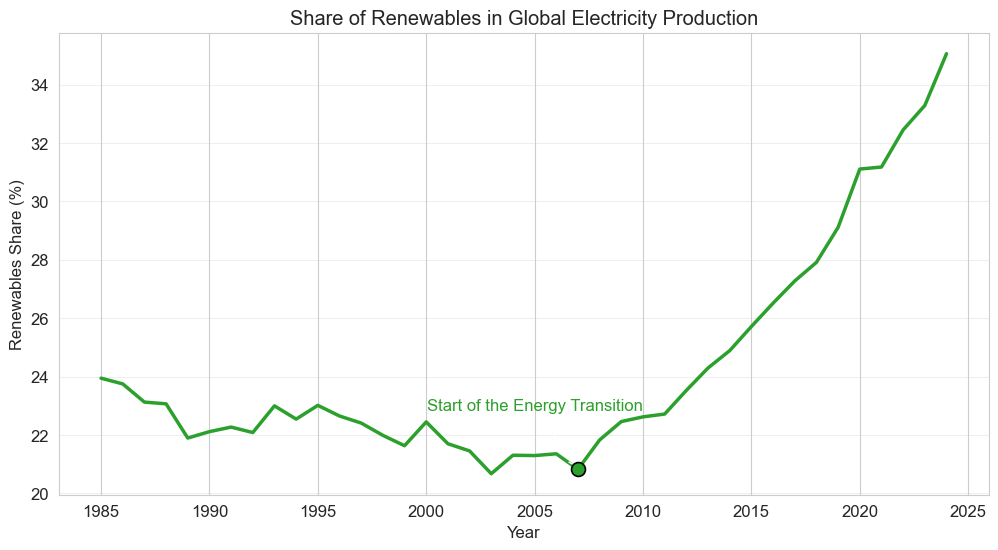

In [8]:
plt.figure(figsize=(12,6))

# Line plot with consistent green color
plt.plot(energy_global['Year'], energy_global['Renewable_Share'], color='#2ca02c', linewidth=2.5)

# Marker and annotation at 2007
year_annot = 2007
renewable_share_value = energy_global.loc[energy_global['Year'] == year_annot, 'Renewable_Share'].values[0]

plt.scatter(year_annot, renewable_share_value, color='#2ca02c', s=100, zorder=5, edgecolor='black', linewidth=1.2)
plt.annotate(
    "Start of the Energy Transition",
    xy=(year_annot, renewable_share_value),
    xytext=(year_annot-2, renewable_share_value + 2),  # text above the marker
    ha='center',
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=12,
    color='#2ca02c'
)

plt.title("Share of Renewables in Global Electricity Production")
plt.xlabel("Year")
plt.ylabel("Renewables Share (%)")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [9]:
# Excel-Datei laden
xls = pd.ExcelFile("../data/lcoe-database.xlsx")

# Liste aller Tabs
print(xls.sheet_names)

['Introduction', 'PV-357', 'PV-4610', 'CSP-357', 'CSP-4610', 'WON-357', 'WON-4610', 'WOF-357', 'WOF-4610', 'CC-357', 'CC-4610', 'GT-357', 'GT-4610', 'GEO-357', 'GEO-4610', 'HYD-357', 'HYD-4610', 'COL-357', 'COL-4610', 'NUC-357', 'NUC-4610', 'BIO-357', 'BIO-4610']


C:\Users\Nico\AppData\Local\Temp\ipykernel_24448\2155333459.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


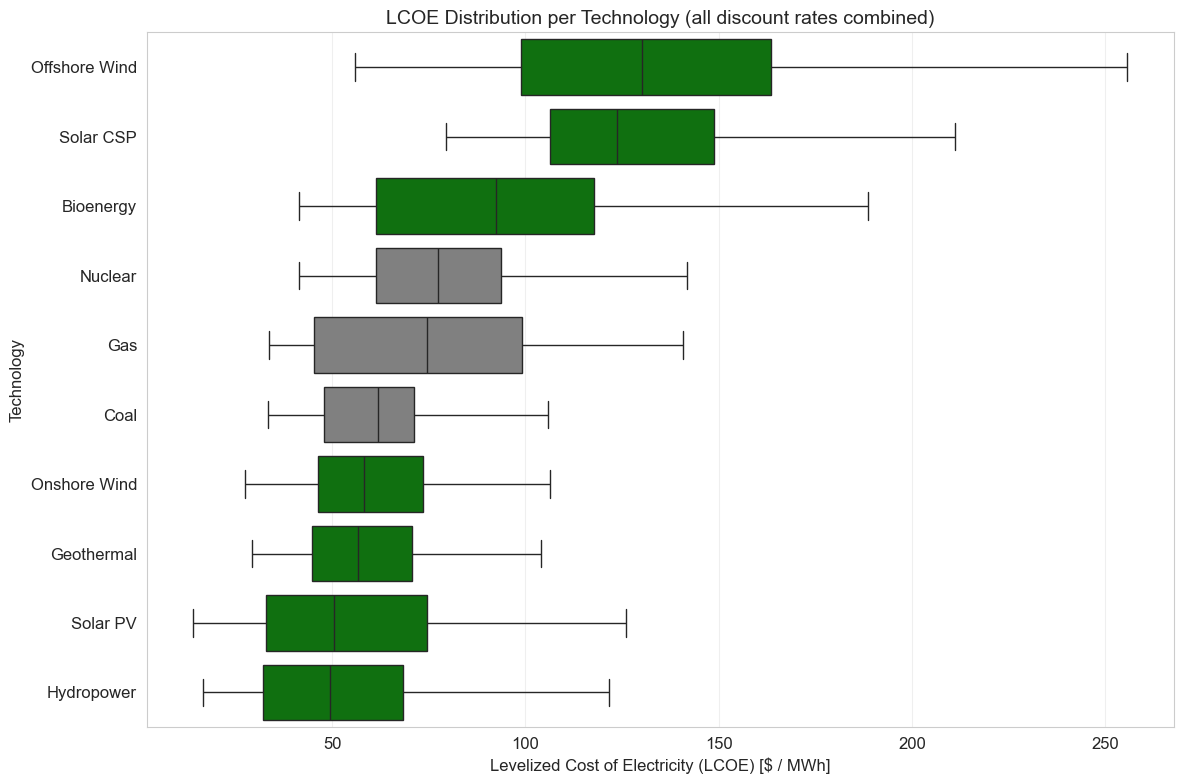

In [10]:

# Get all tabs except "Introduction"
tabs = [tab for tab in xls.sheet_names if tab.lower() != "introduction"]

# Dictionary to store LCOE values per technology
lcoe_values = {}

for tab in tabs:
    # Technology code (everything before "-")
    tech_code = tab.split('-')[0]
    
    df = pd.read_excel(xls, sheet_name=tab, skiprows=4)
    
    # Last column = LCOE values
    values = df.iloc[:, -1].dropna().values
    
    # Merge values for the same technology
    if tech_code in lcoe_values:
        lcoe_values[tech_code] = list(lcoe_values[tech_code]) + list(values)
    else:
        lcoe_values[tech_code] = list(values)

# Combine GT and CC as Gas
gas_values = []
for code in ['GT', 'CC']:
    if code in lcoe_values:
        gas_values += lcoe_values.pop(code)
lcoe_values['GAS'] = gas_values

# Map technical codes to easy-to-understand names
tech_labels = {
    'PV': 'Solar PV',
    'CSP': 'Solar CSP',
    'WON': 'Onshore Wind',
    'WOF': 'Offshore Wind',
    'HYD': 'Hydropower',
    'BIO': 'Bioenergy',
    'GEO': 'Geothermal',
    'COL': 'Coal',
    'GAS': 'Gas',
    'OIL': 'Oil',
    'NUC': 'Nuclear'
}

# Prepare data for Seaborn
data_list = []
for tech_code, values in lcoe_values.items():
    label = tech_labels.get(tech_code, tech_code)  # fallback to code if not in mapping
    for v in values:
        data_list.append({'Technology': label, 'LCOE': v})

df_plot = pd.DataFrame(data_list)

# Calculate median LCOE per technology for sorting (highest to lowest)
medians = df_plot.groupby('Technology')['LCOE'].median().sort_values(ascending=False)
sorted_techs = medians.index.tolist()

# Define colors (renewables green, fossil gray) in sorted order
renewables = ['Solar PV', 'Solar CSP', 'Onshore Wind', 'Offshore Wind', 'Hydropower', 'Bioenergy', 'Geothermal']
palette = ['green' if tech in renewables else 'gray' for tech in sorted_techs]

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='LCOE',
    y='Technology',
    data=df_plot,
    order=sorted_techs,  # sorted descending
    palette=palette,
    showfliers=False
)

# Improve aesthetics
plt.xlabel("Levelized Cost of Electricity (LCOE) [$ / MWh]", fontsize=12)
plt.ylabel("Technology", fontsize=12)
plt.title("LCOE Distribution per Technology (all discount rates combined)", fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
# Renewable Share berechnen
renewables_cols = [
    'Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)',
    'Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)',
    'Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)',
    'Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)',
    'Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)'
]
all_energy_cols = data.columns[3:]
data['Total_TWh'] = data[all_energy_cols].sum(axis=1)
data['Renewable_Share'] = data[renewables_cols].sum(axis=1) / data['Total_TWh'] * 100

# Letztes Jahr pro Land
latest_year = data.groupby('Entity')['Year'].transform('max')
data_latest = data[data['Year'] == latest_year]

# CO2 pro Kopf
latest_year_co2 = data2.groupby('country')['year'].transform('max')
data2_latest = data2[data2['year'] == latest_year_co2]
co2_df = data2_latest[['country', 'co2_per_capita']].copy()

# Merge
merged = pd.merge(data_latest, co2_df, left_on='Entity', right_on='country', how='inner')



In [12]:
countries_100 = merged[merged['Renewable_Share'] == 100]['Entity'].unique()
print(countries_100)
print(f"Anzahl der Länder mit 100%: {len(countries_100)}")

['Albania' 'Bhutan' 'Central African Republic'
 'Democratic Republic of Congo' 'Ethiopia' 'Iceland' 'Lesotho' 'Nepal'
 'Paraguay']
Anzahl der Länder mit 100%: 9


In [13]:
# Länder, die überprüft werden sollen
countries_to_check = ['Brazil', 'Germany', 'Switzerland']

# Ausgabe der Renewable Share für die letzten verfügbaren Jahre
merged[merged['Entity'].isin(countries_to_check)][['Entity', 'Year', 'Renewable_Share']]

,Entity,Year,Renewable_Share
26,Brazil,2024,87.721064
74,Germany,2024,57.445425
187,Switzerland,2024,67.213115


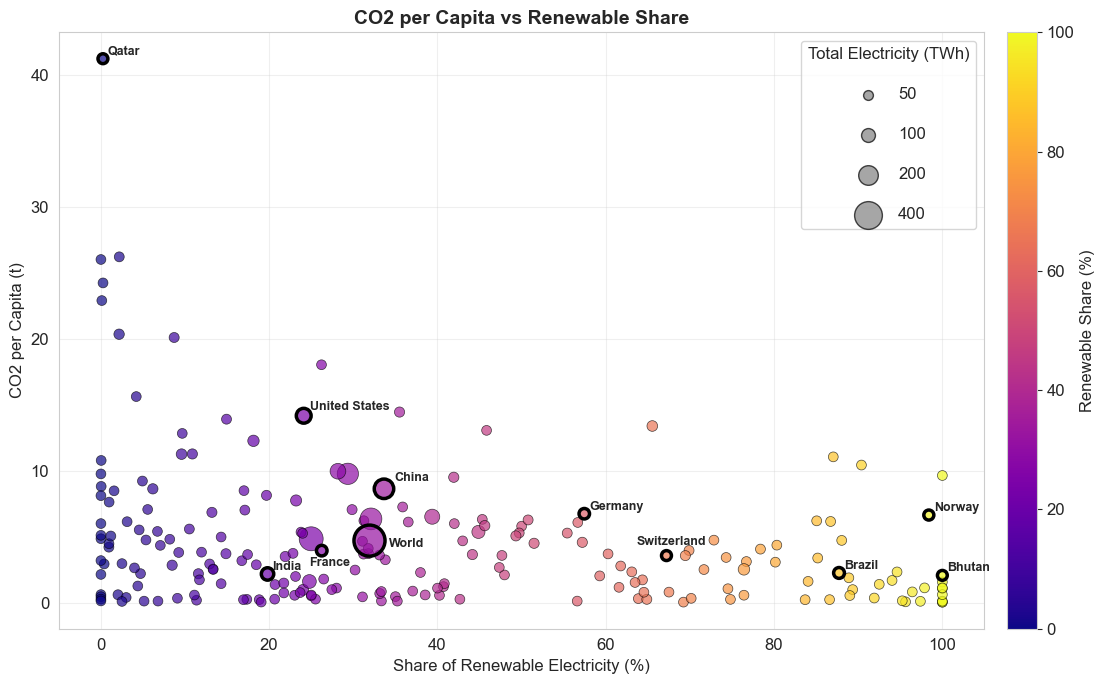

In [14]:


# =========================
# Scatterplot für alle Länder
# =========================
plt.figure(figsize=(12,7))
ax = sns.scatterplot(
    data=merged,
    x='Renewable_Share',
    y='co2_per_capita',
    size='Total_TWh',
    hue='Renewable_Share',
    palette='plasma',      # 🔥 Plasma Palette
    alpha=0.7,
    sizes=(50, 500),
    edgecolor='k',
    linewidth=0.5,
    legend=False
)

# =========================
# Achsen mit Pufferzone (auch unter 0)
# =========================
x_min, x_max = merged['Renewable_Share'].min(), merged['Renewable_Share'].max()
y_min, y_max = merged['co2_per_capita'].min(), merged['co2_per_capita'].max()
plt.ylim(0, 30)
plt.xlim(x_min - 5, x_max + 5)
plt.ylim(y_min - 2, y_max + 2)

# =========================
# Achsentitel & Plot-Titel
# =========================
plt.xlabel("Share of Renewable Electricity (%)", fontsize=12)
plt.ylabel("CO2 per Capita (t)", fontsize=12)
plt.title("CO2 per Capita vs Renewable Share", fontsize=14, weight='bold')

# =========================
# Farbskala (Colorbar)
# =========================
norm = mpl.colors.Normalize(vmin=x_min, vmax=x_max)
sm = mpl.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Renewable Share (%)', fontsize=12)

# =========================
# Größenlegende
# =========================
size_legend = [50, 100, 200, 400]
handles = [
    plt.scatter([], [], s=s, color='gray', alpha=0.7, edgecolors='k', linewidth=1)
    for s in size_legend
]
plt.legend(
    handles,
    [str(s) for s in size_legend],
    title='Total Electricity (TWh)',
    frameon=True,
    labelspacing=1.5,
    loc='upper right'
)

# =========================
# Länder hervorheben & beschriften
# =========================
highlight_countries = [
    'Switzerland', 'Germany', 'United States',
    'China', 'France', 'Brazil', 'India',
    'Qatar', 'Norway', 'World', 'Bhutan'
]

# 🔧 individuelle Text-Offets
label_offsets = {
    'China': (1.2, 0.6),
    'United States': (0.8, 0.4),
    'World': (2.3, -0.5),
    'France': (-1.5, -1.2),
    'Switzerland': (-3.5, 0.8)
}

# Größen-Skalierung rekonstruieren
min_size, max_size = 50, 500
twh_min, twh_max = merged['Total_TWh'].min(), merged['Total_TWh'].max()

def scale_size(twh):
    return min_size + (twh - twh_min) / (twh_max - twh_min) * (max_size - min_size)

for _, row in merged.iterrows():
    if row['Entity'] in highlight_countries:

        # Pinke Umrandung
        ax.scatter(
            row['Renewable_Share'],
            row['co2_per_capita'],
            s=scale_size(row['Total_TWh']),
            facecolors='none',
            edgecolors='black',
            linewidth=2.5,
            zorder=3
        )

        # Default-Offset
        dx, dy = label_offsets.get(row['Entity'], (0.6, 0.3))

        ax.text(
            row['Renewable_Share'] + dx,
            row['co2_per_capita'] + dy,
            row['Entity'],
            fontsize=9,
            weight='bold'
        )

# =========================
# Layout
# =========================
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
